In [0]:
# Intall TensorFlow
# !pip install -q tensorflow-gpu==2.2.0-beta1

try:
  %tensorflow_version 2.x # Colab only
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x # Colab only`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.2.0


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding, Conv1D, MaxPooling1D
from tensorflow.keras.models import Model

In [0]:
# Get the data
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [0]:
# Load in the data
import io
df = pd.read_csv(io.BytesIO(uploaded["spam.csv"]), encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [0]:
# drop unnecessary columns
df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1, inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
# rename columns to something better
df.columns = ["labels", "data"]
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
# create binary labels
df['b_labels'] = df['labels'].map({'ham':0, 'spam':1})
Y = df['b_labels'].values

In [0]:
# split up the data
df_train, df_test, Ytrain, Ytest  = train_test_split(df['data'], Y, test_size=0.33)

In [0]:
# convert sentences to sequences
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequeces_train = tokenizer.texts_to_sequences(df_train)
sequeces_test = tokenizer.texts_to_sequences(df_test)

In [0]:
# get word -> integer mapping
word2idx = tokenizer.word_index
print(word2idx)
V = len(word2idx)
print('\nFound %s unique tokens.' % V)

{'i': 1, 'to': 2, 'you': 3, 'a': 4, 'the': 5, 'u': 6, 'and': 7, 'in': 8, 'is': 9, 'me': 10, 'my': 11, 'for': 12, 'your': 13, 'of': 14, 'call': 15, 'it': 16, 'have': 17, 'on': 18, 'that': 19, 'are': 20, 'now': 21, 'so': 22, '2': 23, 'not': 24, 'but': 25, 'at': 26, 'or': 27, 'no': 28, "i'm": 29, 'can': 30, 'will': 31, 'get': 32, 'be': 33, 'with': 34, 'do': 35, 'if': 36, 'just': 37, 'ur': 38, 'we': 39, 'this': 40, 'up': 41, 'gt': 42, '4': 43, 'from': 44, 'lt': 45, 'go': 46, 'free': 47, 'how': 48, 'when': 49, 'out': 50, 'all': 51, 'ok': 52, 'what': 53, 'know': 54, 'got': 55, 'like': 56, 'then': 57, 'was': 58, 'time': 59, 'am': 60, 'its': 61, 'come': 62, 'good': 63, 'only': 64, 'day': 65, 'he': 66, 'there': 67, 'text': 68, 'want': 69, 'one': 70, 'love': 71, 'send': 72, 'by': 73, 'txt': 74, 'about': 75, 'n': 76, 'going': 77, 'today': 78, 'sorry': 79, 'home': 80, 'need': 81, "i'll": 82, 'as': 83, 'r': 84, 'stop': 85, 'mobile': 86, 'our': 87, 'back': 88, 'still': 89, 'see': 90, 'lor': 91, 'rep

In [0]:
# pad sequences so that we get a N x T matrix
data_train = pad_sequences(sequeces_train)
print('Shape of data train tensor:', data_train.shape)

T = data_train.shape[1]

Shape of data train tensor: (3733, 162)


In [0]:
data_test = pad_sequences(sequeces_test)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (1839, 176)


# **RNN**

In [0]:
# Create the model

# We get to choose embedding dimensionality
D = 20

# Hidden state dimentionality
M = 15

# Note: we actually want to the size of the embedding to (V + 1) x D
# because the first index starts from 1 and not 0
#Thus, if the final index of the embadding matrix is V,
# then it actually must have size V + 1

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

In [0]:
# Compile and fit the model
model.compile(
    loss = 'binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

print('Training model...')
r= model.fit(
    data_train,
    Ytrain,
    epochs=10,
    validation_data=(data_test, Ytest)
)

Training model...
Epoch 1/10
117/117 [==============================] - 8s 71ms/step - loss: 0.4600 - accuracy: 0.8647 - val_loss: 0.3972 - val_accuracy: 0.8657
Epoch 2/10
117/117 [==============================] - 8s 67ms/step - loss: 0.3882 - accuracy: 0.8661 - val_loss: 0.3573 - val_accuracy: 0.8657
Epoch 3/10
117/117 [==============================] - 8s 67ms/step - loss: 0.2979 - accuracy: 0.8661 - val_loss: 0.2249 - val_accuracy: 0.8657
Epoch 4/10
117/117 [==============================] - 8s 67ms/step - loss: 0.1557 - accuracy: 0.9569 - val_loss: 0.1189 - val_accuracy: 0.9804
Epoch 5/10
117/117 [==============================] - 8s 68ms/step - loss: 0.0789 - accuracy: 0.9909 - val_loss: 0.0798 - val_accuracy: 0.9869
Epoch 6/10
117/117 [==============================] - 8s 67ms/step - loss: 0.0459 - accuracy: 0.9960 - val_loss: 0.0632 - val_accuracy: 0.9880
Epoch 7/10
117/117 [==============================] - 8s 68ms/step - loss: 0.0292 - accuracy: 0.9979 - val_loss: 0.0564 - va

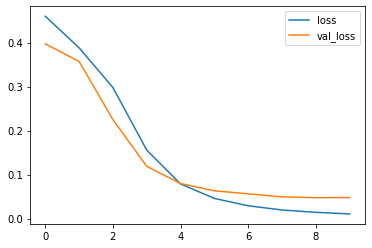

In [0]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

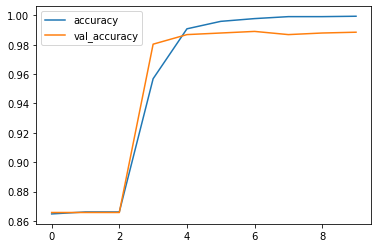

In [0]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

# **CNN**

In [0]:
# Create the model

# We get to choose embedding dimensionality
D = 20

# Note: we actually want to the size of the embedding to (V + 1) x D
# because the first index starts from 1 and not 0
# Thus, if the final index of the embadding matrix is V,
# then it actually must have size V + 1

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = Conv1D(32, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(64, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128, 3, activation='relu')(x)
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

In [46]:
# Compile and fit the model
model.compile(
    loss = 'binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

print('Training model...')
r= model.fit(
    data_train,
    Ytrain,
    epochs=5,
    validation_data=(data_test, Ytest)
)

Training model...
Epoch 1/5
117/117 [==============================] - 4s 32ms/step - loss: 0.4226 - accuracy: 0.8580 - val_loss: 0.3911 - val_accuracy: 0.8657
Epoch 2/5
117/117 [==============================] - 3s 26ms/step - loss: 0.2989 - accuracy: 0.8661 - val_loss: 0.3894 - val_accuracy: 0.8657
Epoch 3/5
117/117 [==============================] - 3s 26ms/step - loss: 0.1616 - accuracy: 0.9577 - val_loss: 0.2509 - val_accuracy: 0.9592
Epoch 4/5
117/117 [==============================] - 3s 27ms/step - loss: 0.0879 - accuracy: 0.9847 - val_loss: 0.2313 - val_accuracy: 0.9657
Epoch 5/5
117/117 [==============================] - 3s 27ms/step - loss: 0.0576 - accuracy: 0.9912 - val_loss: 0.1948 - val_accuracy: 0.9739


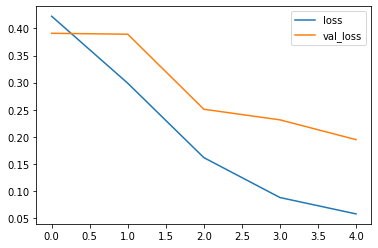

In [47]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

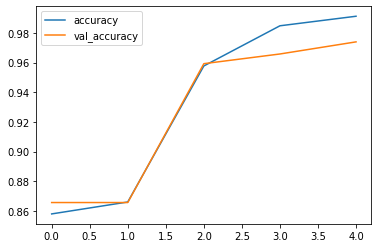

In [48]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()